In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import requests

In [3]:

file_name = 'opencovid19-fr-chiffres-cles.csv'
url = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)

2212311

In [4]:
data = pd.read_csv('opencovid19-fr-chiffres-cles.csv')

In [17]:
data.tail()

date granularite maille_code                  maille_nom  \
13308  2020-06-09      region      REG-75          Nouvelle-Aquitaine   
13309  2020-06-09      region      REG-76                   Occitanie   
13310  2020-06-09      region      REG-84        Auvergne-Rhône-Alpes   
13311  2020-06-09      region      REG-93  Provence-Alpes-Côte d'Azur   
13312  2020-06-09      region      REG-94                       Corse   

       cas_confirmes  cas_ehpad  cas_confirmes_ehpad  cas_possibles_ehpad  \
13308            NaN        NaN                  NaN                  NaN   
13309            NaN        NaN                  NaN                  NaN   
13310            NaN        NaN                  NaN                  NaN   
13311            NaN        NaN                  NaN                  NaN   
13312            NaN        NaN                  NaN                  NaN   

        deces  deces_ehpad  ...  hospitalises  nouvelles_hospitalisations  \
13308   405.0          NaN  ...         189.0                         6.0   
13309   503.0          NaN  ...         168.0                         4.0   
13310  1707.0          NaN  ...         865.0                         9.0   
13311   919.0          NaN  ...         776.0                        11.0   
13312    58.0          NaN  ...          26.0                         0.0   

       nouvelles_reanimations  gueris  depistes      source_nom source_url  \
13308                     0.0  2060.0       NaN  OpenCOVID19-fr        NaN   
13309                     0.0  2769.0       NaN  OpenCOVID19-fr        NaN   
13310                     0.0  7339.0       NaN  OpenCOVID19-fr        NaN   
13311                     0.0  5074.0       NaN  OpenCOVID19-fr        NaN   
13312                     0.0   233.0       NaN  OpenCOVID19-fr        NaN   

      source_archive     source_type          t  
13308            NaN  opencovid19-fr 2020-06-09  
13309            NaN  opencovid19-fr 2020-06-09  
13310            NaN  opencovid19-fr 2020-06-09  
13311            NaN  opencovid19-fr 2020-06-09  
13312            NaN  opencovid19-fr 2020-06-09  

[5 rows x 21 columns]

In [5]:
for a in data[["maille_code", "maille_nom"]].groupby(["maille_code", "maille_nom"]):
    print(f"{a[0]}")

('COM-974', 'La Réunion')
('COM-977', 'Saint-Barthélemy')
('COM-978', 'Saint-Martin')
('COM-986', 'Wallis et Futuna')
('COM-987', 'Polynésie française')
('COM-988', 'Nouvelle-Calédonie')
('DEP-01', 'Ain')
('DEP-02', 'Aisne')
('DEP-03', 'Allier')
('DEP-04', 'Alpes-de-Haute-Provence')
('DEP-05', 'Hautes-Alpes')
('DEP-06', 'Alpes-Maritimes')
('DEP-07', 'Ardèche')
('DEP-08', 'Ardennes')
('DEP-09', 'Ariège')
('DEP-10', 'Aube')
('DEP-11', 'Aude')
('DEP-12', 'Aveyron')
('DEP-13', 'Bouches-du-Rhône')
('DEP-14', 'Calvados')
('DEP-15', 'Cantal')
('DEP-16', 'Charente')
('DEP-17', 'Charente-Maritime')
('DEP-18', 'Cher')
('DEP-19', 'Corrèze')
('DEP-21', "Côte-d'Or")
('DEP-22', "Côtes-d'Armor")
('DEP-23', 'Creuse')
('DEP-24', 'Dordogne')
('DEP-25', 'Doubs')
('DEP-26', 'Drôme')
('DEP-27', 'Eure')
('DEP-28', 'Eure-et-Loir')
('DEP-29', 'Finistère')
('DEP-2A', 'Corse-du-Sud')
('DEP-2B', 'Haute-Corse')
('DEP-30', 'Gard')
('DEP-31', 'Haute-Garonne')
('DEP-32', 'Gers')
('DEP-33', 'Gironde')
('DEP-34', 'Hér

In [6]:
def enable_time_series_plot(
    in_df, 
    timein_field='time', 
    timeseries_field_out='date', 
    date_format="%Y-%m-%d",
    ):
    """
    Small tool to add a field to a dataframe which can be used for time series
    plotting
    """
    if timeseries_field_out not in in_df.columns:
        in_df[timeseries_field_out] = pd.to_datetime(
            in_df[timein_field],
            format=date_format
        )
    return in_df
data = enable_time_series_plot(data, timein_field='date', 
    timeseries_field_out='t')

In [7]:
def axis_date_limits(ax, min_date=None, max_date=None):
    # Tailor axis limits
    x_min, x_max = pd.to_datetime(ax.get_xlim())
    if not (max_date is None):
        ax.set_xlim(right=min(x_max, pd.to_datetime(max_date)))
    if not (min_date is None):
        ax.set_xlim(left=max(x_min, pd.to_datetime(min_date)))

In [8]:
def func(data, maille_code, rows=["t", "deces", "deces_ehpad", "reanimation", "hospitalises"], no_negatives=["deces", "deces_ehpad"]):
    if maille_code == 'FRA':
        fra = data.loc[(data["maille_code"]==maille_code) & (data["source_nom"]!='OpenCOVID19-fr'),]
        
    else:
        fra = data.loc[(data["maille_code"]==maille_code) & (data["source_nom"]=='OpenCOVID19-fr'),]

    region = fra["maille_nom"].unique()[0]
    fra = fra[rows]
    non_time_rows = [key for key in rows if key != 't']
    # Fill nas
    for i, (ind, row)  in enumerate(fra.iterrows()):
        for f in non_time_rows:
            if pd.isna(row[f]):
                if i > 0:
                    fra.loc[ind, f] = fra.iloc[i-1,fra.columns.get_loc(f)]
                else:
                    fra.loc[ind, f] = 0.0
    fra = fra.groupby(["t"]).aggregate(
        {
            "t":'first',
             **{key:'max' for key in non_time_rows}
        })
    fra = fra.set_index("t")
    for i in range(fra.shape[0]-1, 0, -1):
        row_num = i
        for col in no_negatives:
            col_num = fra.columns.get_loc(col) 
            val = fra.iloc[row_num, col_num]
            val_prev = fra.iloc[row_num-1, col_num]
            if val < val_prev:
                fra.iloc[row_num-1, col_num] = val
    # ajout des totaux par jours
    def par_jour(df): return df - [0, *(df[:-1])]
    fra["reanimation_cumul"] = fra["reanimation"].cumsum()
    non_time_rows.append("reanimation_cumul")
    fra["hospitalises_cumul"] = fra["hospitalises"].cumsum()
    non_time_rows.append("hospitalises_cumul")
    for f in non_time_rows:
        fra[f + "_jour"] = par_jour(fra[f])
        f += "_jour" 
        fra[f + "_jour"] = par_jour(fra[f])
    # Ajout de entree + sortie vivante de reanimation
    fra["reanimation_solde_vivant_jour"] = fra["reanimation_jour"] + fra["deces_jour"]
    fra["reanimation_solde_vivant_jour_jour"] = par_jour(fra["reanimation_solde_vivant_jour"])
    # Rolling averages
    for f in [*non_time_rows, "reanimation_solde_vivant"]:
        f = f + "_jour"
        fra[f + "_mma"] = fra[f].rolling(7).mean()
        f = f + "_jour"
        fra[f + "_mma"] = fra[f].rolling(7).mean()
    
    for f in ["deces_jour_mma", "deces_ehpad_jour_mma"]:
        fra[f + "_jour"] = fra[f] - [0, *(fra[f][:-1])]

    for f in non_time_rows:
        fra[f + "_jour_prop"] = fra[f + "_jour_mma"] / fra[f]
    f = "reanimation_solde_vivant"
    fra[f + "_jour_prop"] = fra[f + "_jour_mma"] / fra["reanimation"]
    f = "deces_jour_mma"
    fra[f + "_jour_prop"] = fra[f + "_jour"] / fra["deces_jour_mma"]

    fig, axs = plt.subplots(1,3)
    fig.set_size_inches((15, 5))
    for i, ext in enumerate(["_jour", "_jour_mma", "_jour_prop"]):
       
        fra.plot(
            y=["deces" + ext, "deces_ehpad" + ext, "reanimation" + ext, "reanimation_solde_vivant" + ext],
            ax=axs[i]
        )
        axs[i].grid(which="major")
        axs[i].set_title(region)
        axis_date_limits(axs[i], min_date="2020-03-01")
    return fra

deces  deces_ehpad  reanimation  hospitalises  \
t                                                             
2020-05-31  18475.0      10327.0       1319.0       14322.0   
2020-06-01  18506.0      10327.0       1302.0       14288.0   
2020-06-02  18590.0      10350.0       1253.0       14028.0   
2020-06-03  18671.0      10350.0       1210.0       13514.0   
2020-06-04  18715.0      10350.0       1163.0       13101.0   
2020-06-05  18761.0      10350.0       1094.0       12696.0   
2020-06-06  18792.0      10350.0       1059.0       12479.0   
2020-06-07  18805.0      10350.0       1053.0       12461.0   
2020-06-08  18859.0      10350.0       1024.0       12315.0   
2020-06-09  18912.0      10384.0        955.0       11961.0   

            reanimation_cumul  hospitalises_cumul  deces_jour  \
t                                                               
2020-05-31           294090.0           1675905.0        31.0   
2020-06-01           295392.0           1690193.0        31.0   
2020-06-02           296645.0           1704221.0        84.0   
2020-06-03           297855.0           1717735.0        81.0   
2020-06-04           299018.0           1730836.0        44.0   
2020-06-05           300112.0           1743532.0        46.0   
2020-06-06           301171.0           1756011.0        31.0   
2020-06-07           302224.0           1768472.0        13.0   
2020-06-08           303248.0           1780787.0        54.0   
2020-06-09           304203.0           1792748.0        53.0   

            deces_jour_jour  deces_ehpad_jour  deces_ehpad_jour_jour  ...  \
t                                                                     ...   
2020-05-31            -26.0               0.0                    0.0  ...   
2020-06-01              0.0               0.0                    0.0  ...   
2020-06-02             53.0              23.0                   23.0  ...   
2020-06-03             -3.0               0.0                  -23.0  ...   
2020-06-04            -37.0               0.0                    0.0  ...   
2020-06-05              2.0               0.0                    0.0  ...   
2020-06-06            -15.0               0.0                    0.0  ...   
2020-06-07            -18.0               0.0                    0.0  ...   
2020-06-08             41.0               0.0                    0.0  ...   
2020-06-09             -1.0              34.0                   34.0  ...   

            deces_jour_mma_jour  deces_ehpad_jour_mma_jour  deces_jour_prop  \
t                                                                             
2020-05-31            -0.571429                   0.000000         0.003503   
2020-06-01            -8.428571                   0.000000         0.003041   
2020-06-02             0.142857                   3.285714         0.003035   
2020-06-03             2.285714                   0.000000         0.003145   
2020-06-04            -3.142857                   0.000000         0.002969   
2020-06-05            -2.142857                   0.000000         0.002848   
2020-06-06            -3.714286                   0.000000         0.002646   
2020-06-07            -2.571429                   0.000000         0.002507   
2020-06-08             3.285714                   0.000000         0.002674   
2020-06-09            -4.428571                   1.571429         0.002432   

            deces_ehpad_jour_prop  reanimation_jour_prop  \
t                                                          
2020-05-31               0.000000              -0.036391   
2020-06-01               0.000000              -0.033684   
2020-06-02               0.000317              -0.034432   
2020-06-03               0.000317              -0.034357   
2020-06-04               0.000317              -0.032674   
2020-06-05               0.000317              -0.034866   
2020-06-06               0.000317              -0.035883   
2020-06-07               0.000317              -0.036087   
20

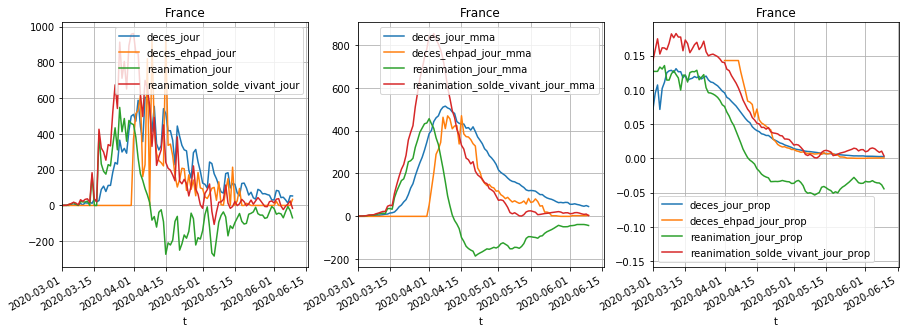

In [9]:
maille_active = 'FRA'
fra = func(data, maille_active)
fra.tail(10)

In [10]:
list_reg = [r for r in data["maille_code"].unique() if "REG" in r]

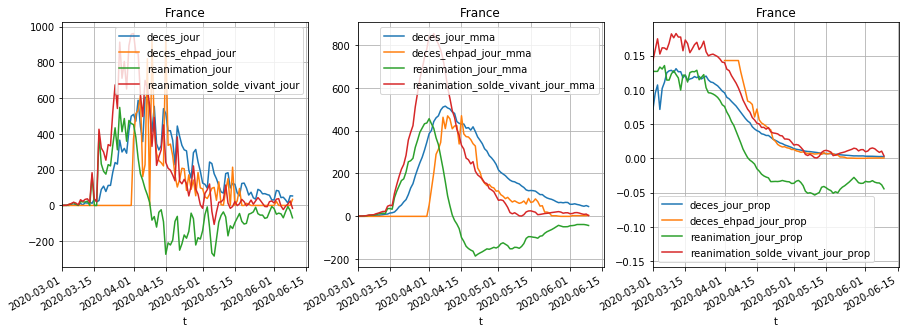

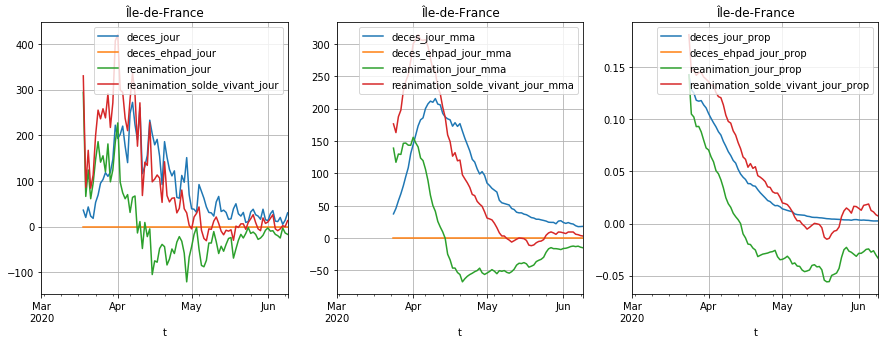

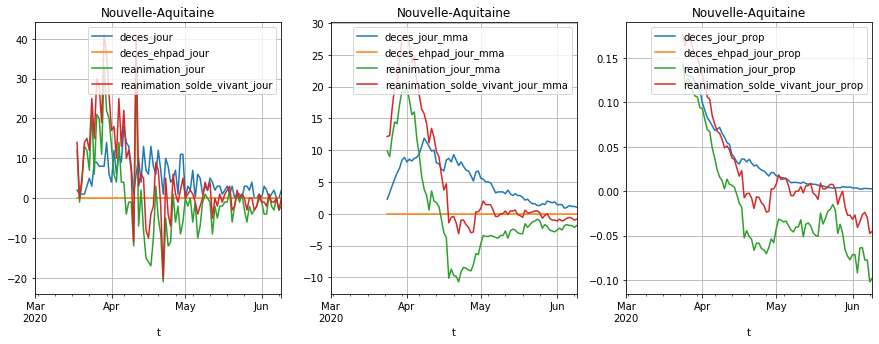

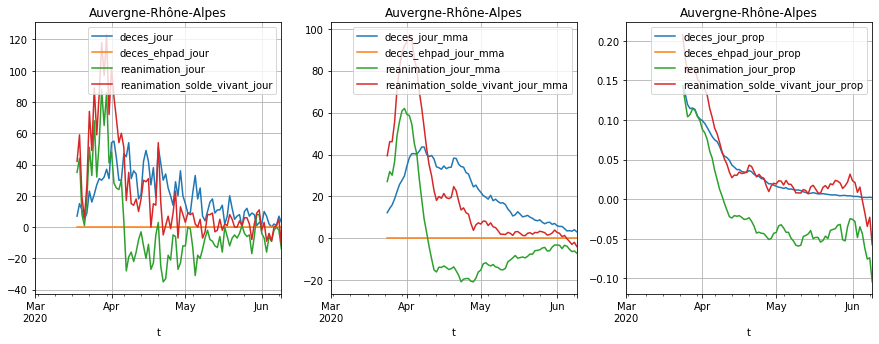

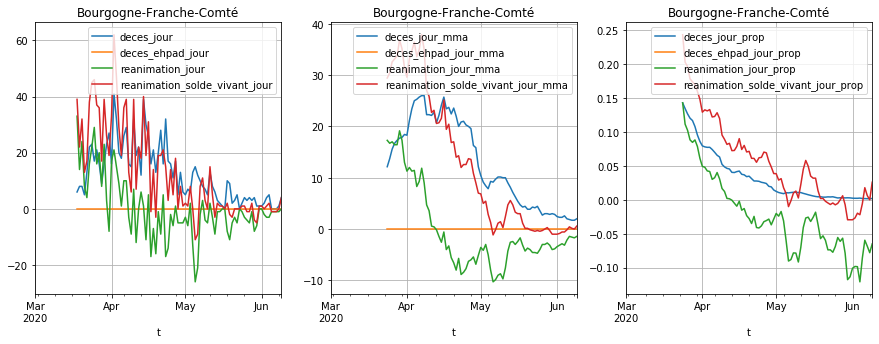

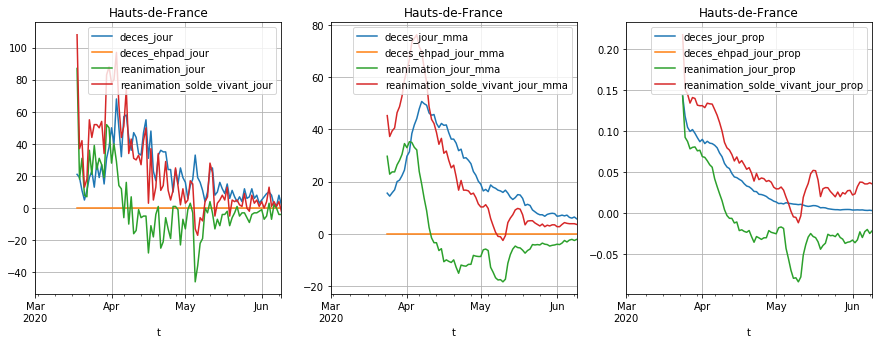

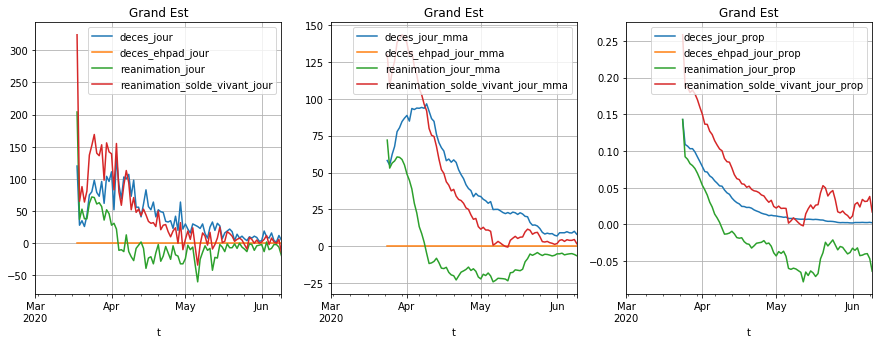

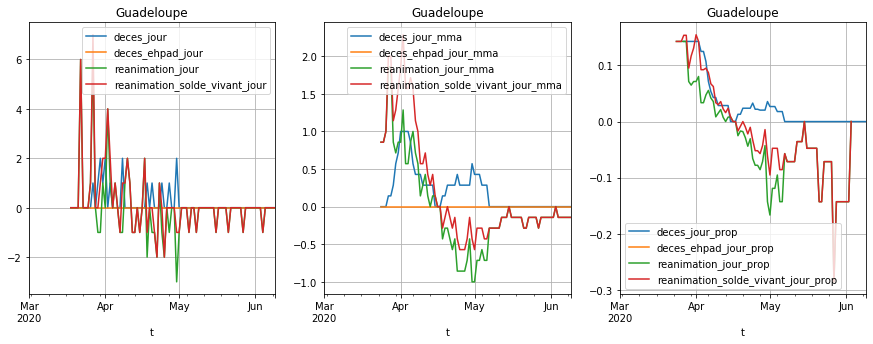

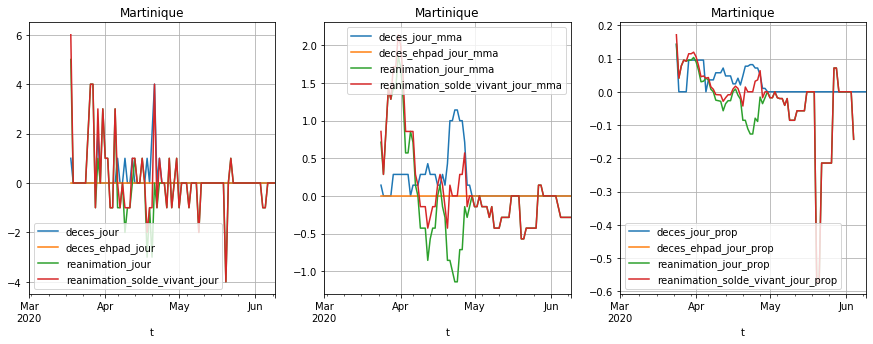

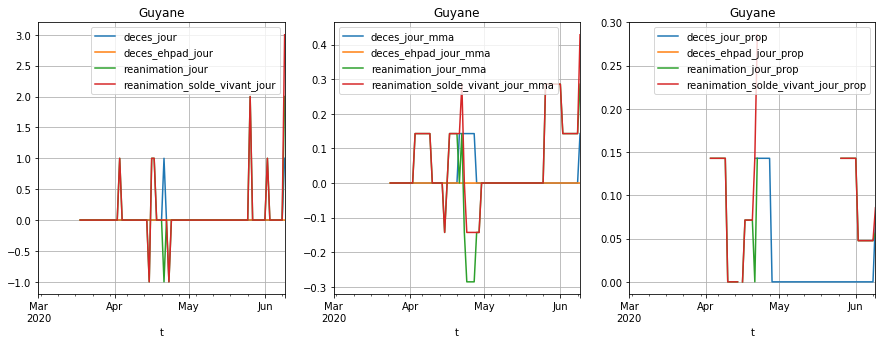

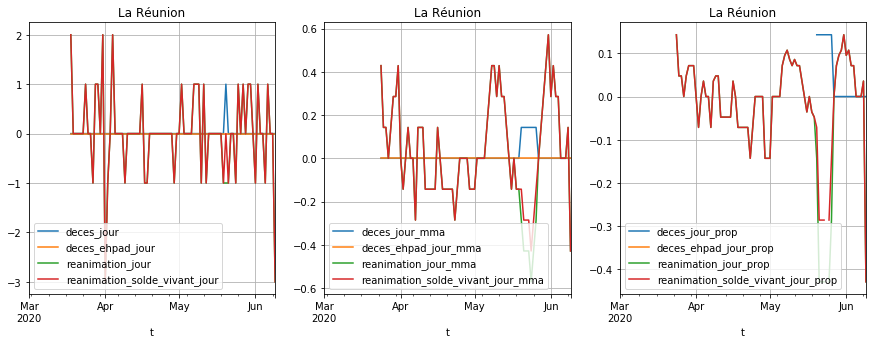

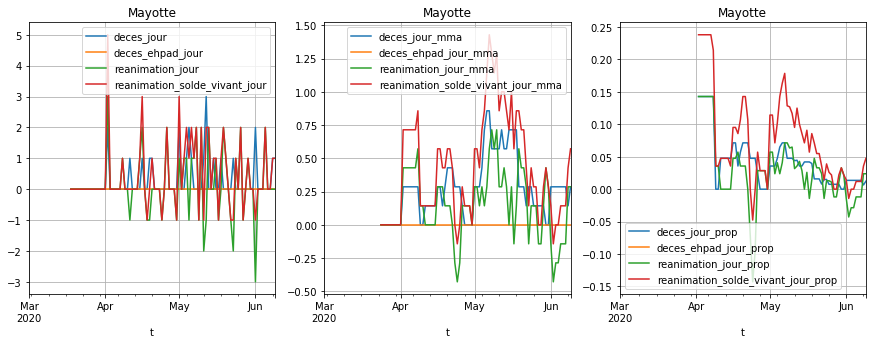

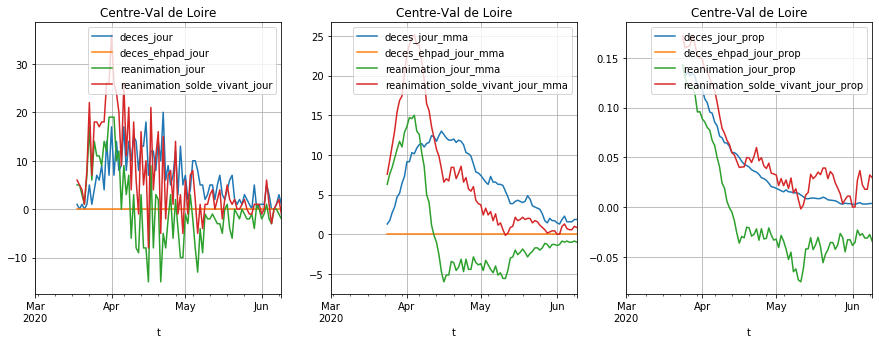

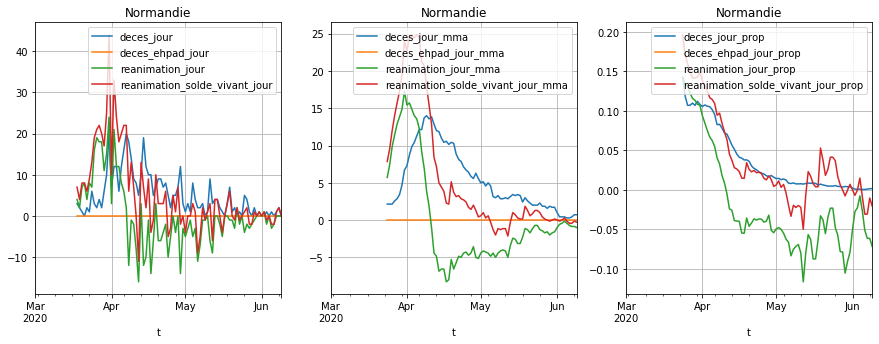

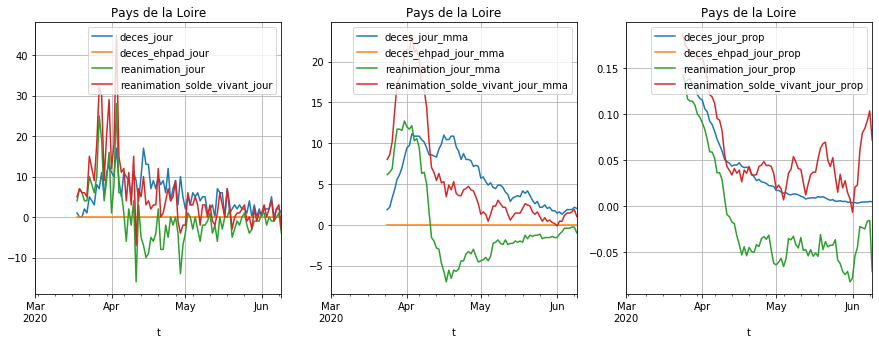

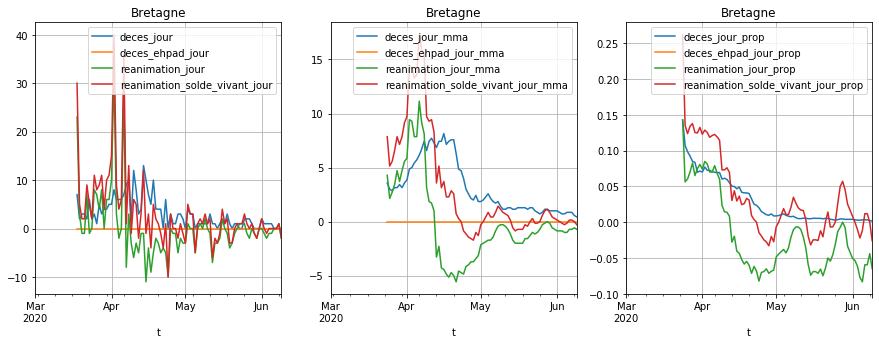

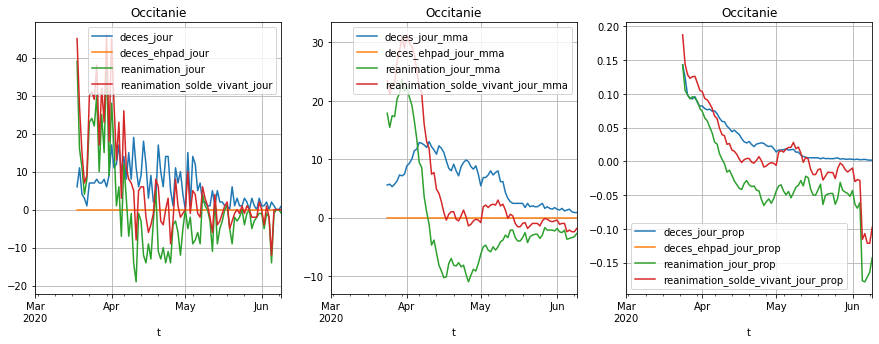

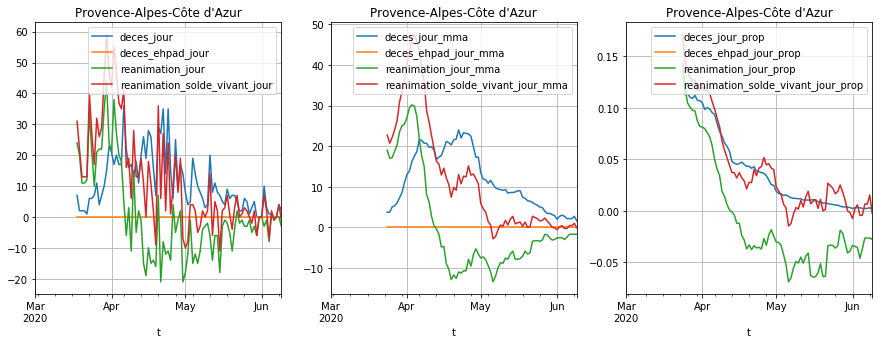

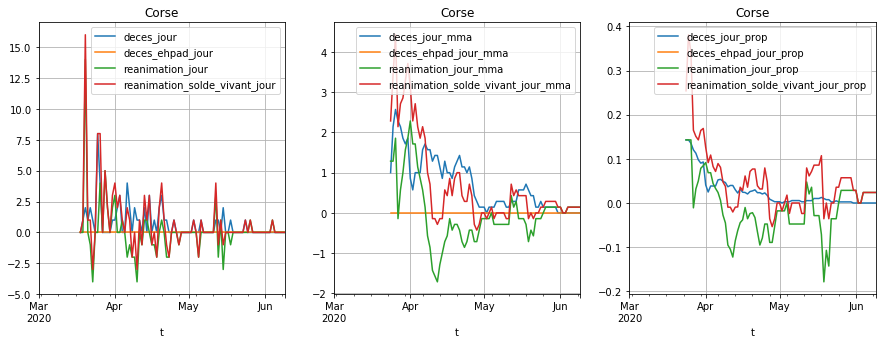

In [11]:
func(data, 'FRA')
for reg in list_reg:
    func(data, reg)

In [18]:
from matplotlib.ticker import FuncFormatter
from matplotlib.rcsetup import cycler

def rol_val(df, list_rolls, **kwargs):
    if list_rolls:
        return rol_val(df,list_rolls[:-1],**kwargs).rolling(list_rolls[-1],**kwargs).mean()
    else:
        return df
def plot_field_loops(fra, field, smoothing = [7,2,3], maille_active="", **kwargs):
    smooth_rol_val = lambda df: rol_val(
        df,
        smoothing,
        **kwargs
    )

    fra[field + "_smooth_acceleration"] = smooth_rol_val(fra[field + "_jour_jour"])
    fra[field + "_jour_smooth"] =  smooth_rol_val(fra[field + "_jour"])

    fra[field + "_smooth_acceleration_prop"] = fra[field + "_smooth_acceleration"] / fra[field + "_jour_mma"]

    fig, axs = plt.subplots(1,3)
    fig.suptitle(f"Acceleration du nombre de {field} en {maille_active}")
    fig.set_size_inches(16,5)
    colors = []
    for c in plt.rcParams["axes.prop_cycle"].by_key()['color']:
        colors.append(c)
        colors.append(c)
    for ax in axs[:2]:
        ax.set_prop_cycle(cycler(color=colors))


    date_debut = pd.date_range(start='2020-03-09', periods=1, freq='d')
    date_fin = pd.to_datetime('2020-06-10')
    rolling_val = [1]

    rolled_fra = rol_val(fra, rolling_val)
    incr_val = date_debut[0].freq * 7
    while date_debut < date_fin:
        week_label = f'semaine du {date_debut[0].strftime("%d/%m")}'
        ind_log =  (date_debut[0] <= rolled_fra.index) & (rolled_fra.index <= date_debut[0]+incr_val)
        # Timeline
        rolled_fra[ind_log].plot(
            y=field + "_jour", marker='o', linestyle='',
            ax=axs[0], label='', markersize=3,
        )
        rolled_fra[ind_log].plot(
            y=field + "_jour_smooth", 
            ax=axs[0], label=week_label
        )
        # Timeline
        rolled_fra[ind_log].plot(
            x=field + "_jour_smooth", y=field + "_jour_jour", 
            marker='o', ax=axs[1], label='', markersize=3, linestyle=''
        )
        rolled_fra[ind_log].plot(
            x=field + "_jour_smooth", y=field + "_smooth_acceleration", 
            marker='+', ax=axs[1], label=week_label
        )
        # Timeline
        rolled_fra[ind_log].plot(
            x=field + "_jour_smooth", y=field + "_smooth_acceleration_prop",
            marker='+', ax=axs[2], label=week_label
        )
        date_debut += incr_val
    for ax in axs:
        lines = []
        for line in ax.get_legend().get_lines():
            if line.get_label():
                lines.append(line)
        ax.legend(handles=lines)
    first_smooth = smoothing[:1]
    axs[0].set_ylabel(f"{field} par jour (moyenne sur {first_smooth} jours)")
    axs[0].grid('on')
    lines = []
    
    axs[1].set_xlabel("{} par jour (moyenne sur {} jours)".format(field, first_smooth))
    axs[1].set_ylabel("Delta journalier de l'abscisse ($x_t - x_{t-1}$)")
    axs[1].grid('on')

    axs[2].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
    axs[2].grid('on')
    axs[2].set_ylabel("Delta proportionel journalier de l'abscisse")
    lims = axs[2].get_ylim()
    if lims[0] < -0.2 or lims[1] > 0.5:
        axs[2].set_ylim(-0.2,0.5)
    axs[1].get_legend().remove()
    axs[2].get_legend().remove()

In [13]:
list_reg[0]

'REG-11'

In [14]:
def plots_maille_code(maille_active='FRA'):
    fra = func(data, maille_active)
    plot_field_loops(fra, "deces", center=False, maille_active=maille_active)
    plot_field_loops(fra, "deces_ehpad", center=False, maille_active=maille_active)
    plot_field_loops(fra, "reanimation_cumul", [7], center=True, maille_active=maille_active)
    plot_field_loops(fra, "hospitalises_cumul", [7], center=True, maille_active=maille_active)


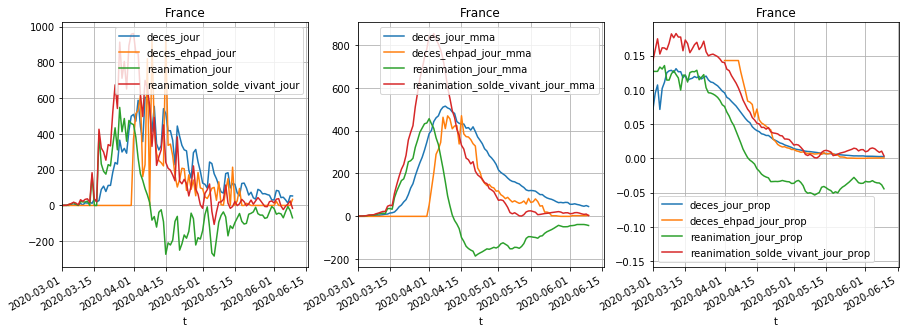

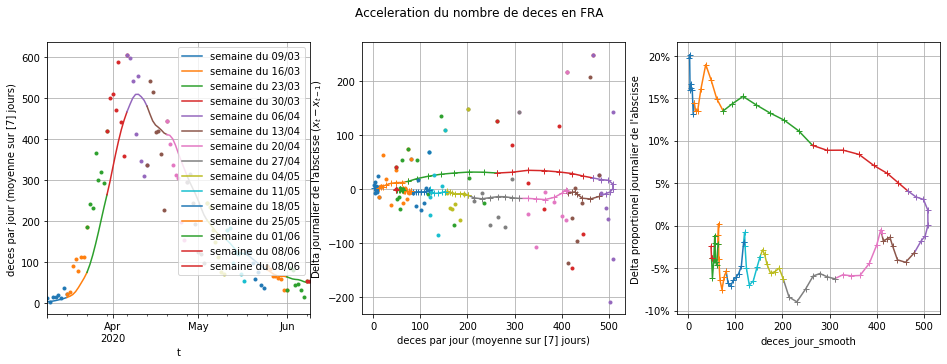

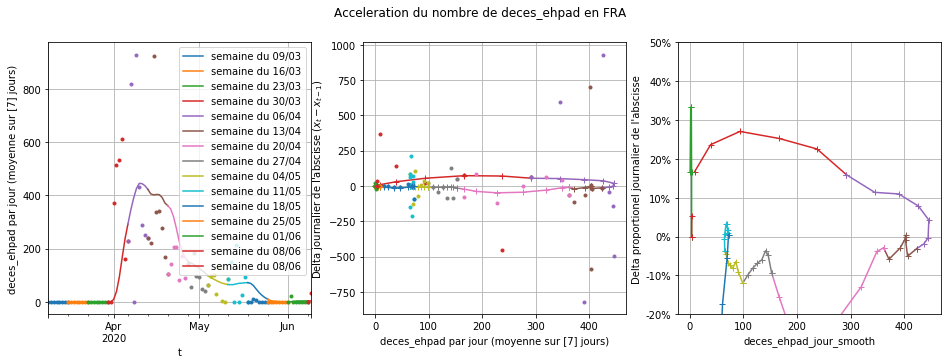

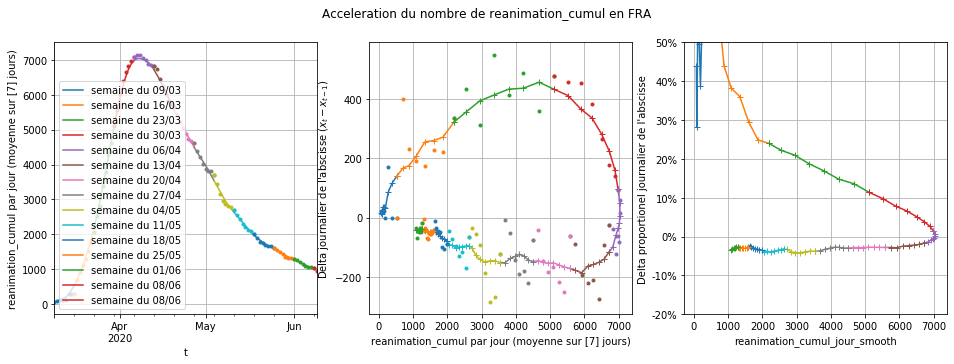

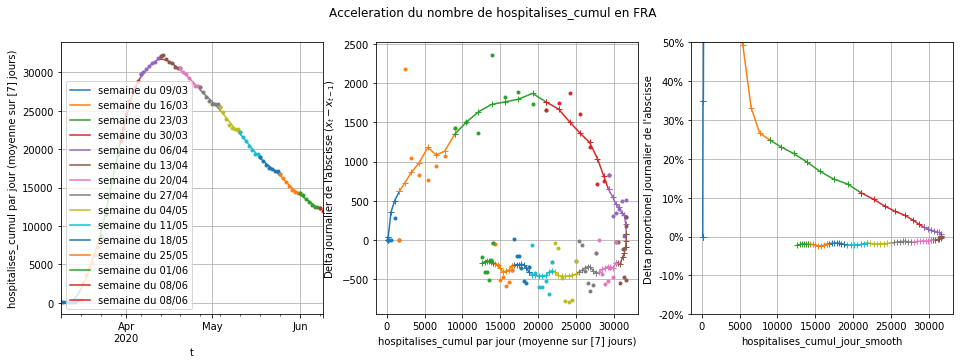

In [19]:
plots_maille_code(maille_active='FRA')

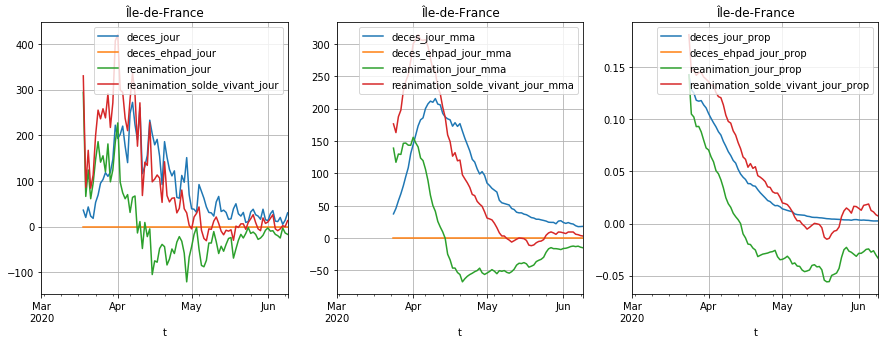

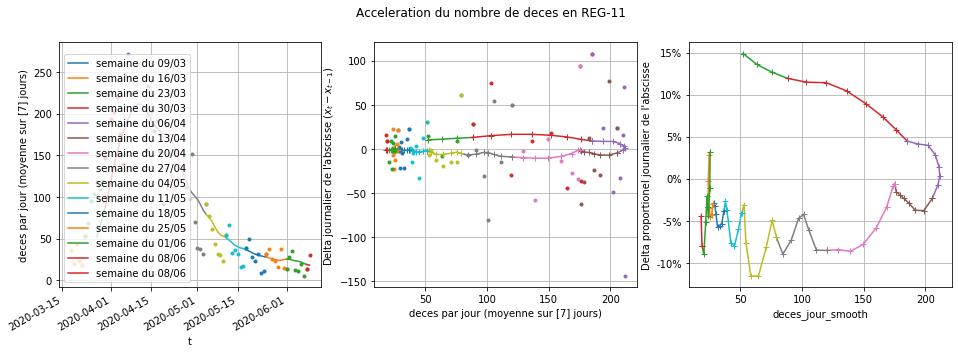

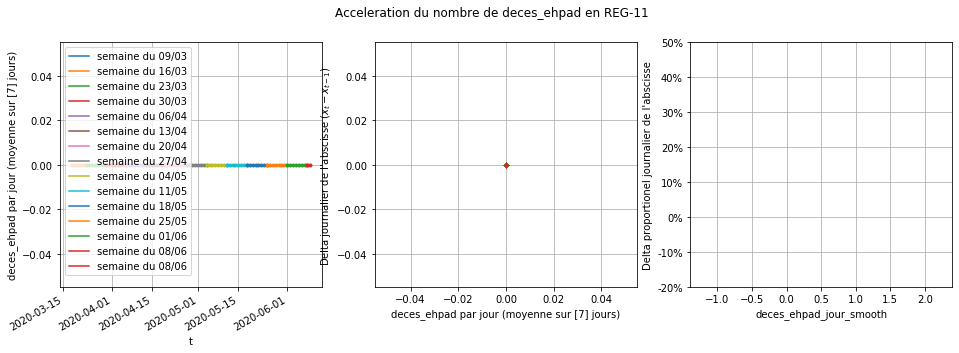

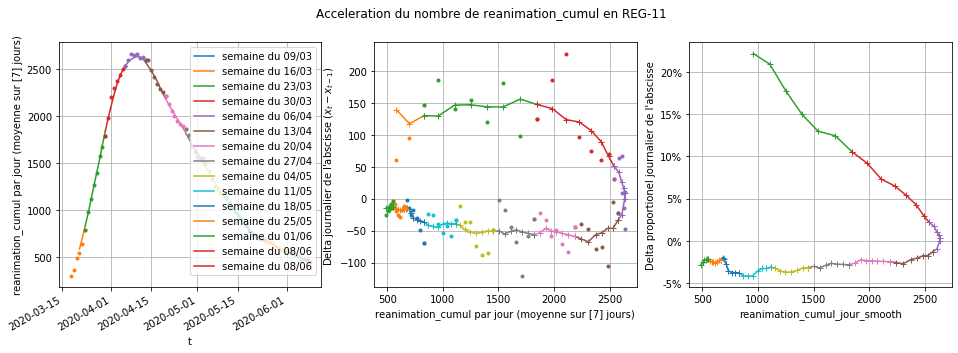

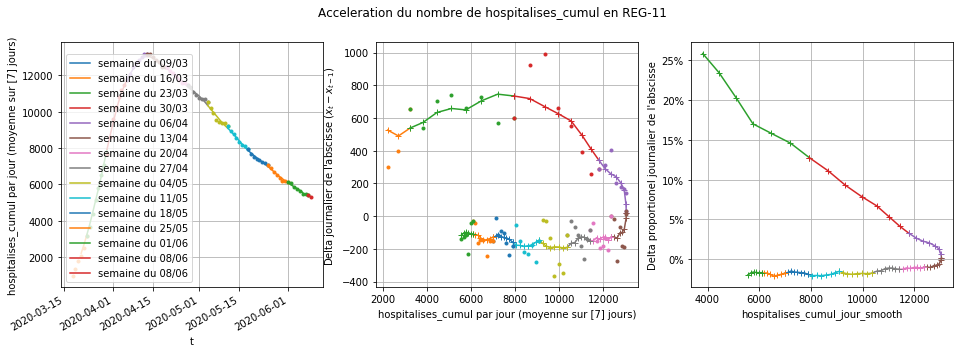

In [20]:
plots_maille_code(maille_active='REG-11')